<a href="https://colab.research.google.com/github/ravali217/Hierarchical-clustering/blob/main/Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = '/content/drive/My Drive/all-data.csv'
df = pd.read_csv(path, encoding='latin1')

df.head()

Mounted at /content/drive


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
df.isna().sum()
df.columns

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english'
)

x = vectorizer.fit_transform(text_data).toarray()

print(x.shape)



(4845, 1000)


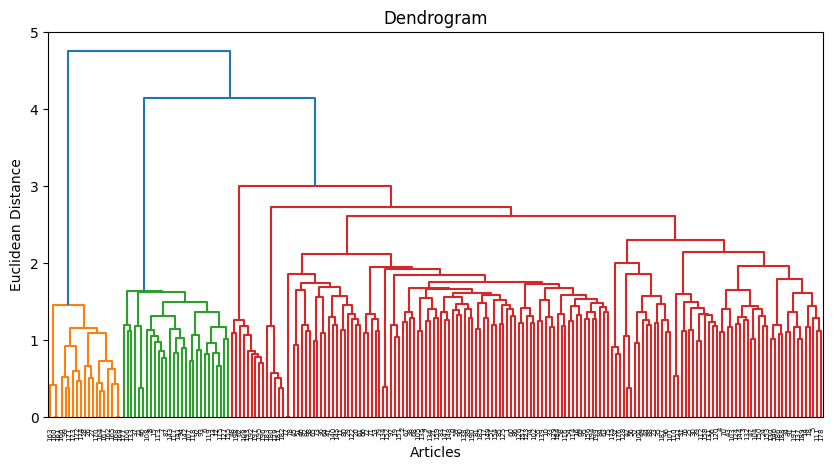

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

x_subset = x[:200]

plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(
    sch.linkage(x_subset, method='ward')
)

plt.title("Dendrogram")
plt.xlabel("Articles")
plt.ylabel("Euclidean Distance")
plt.show()




In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

y_hc = hc.fit_predict(x)

print(y_hc)



[1 1 0 ... 3 3 0]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


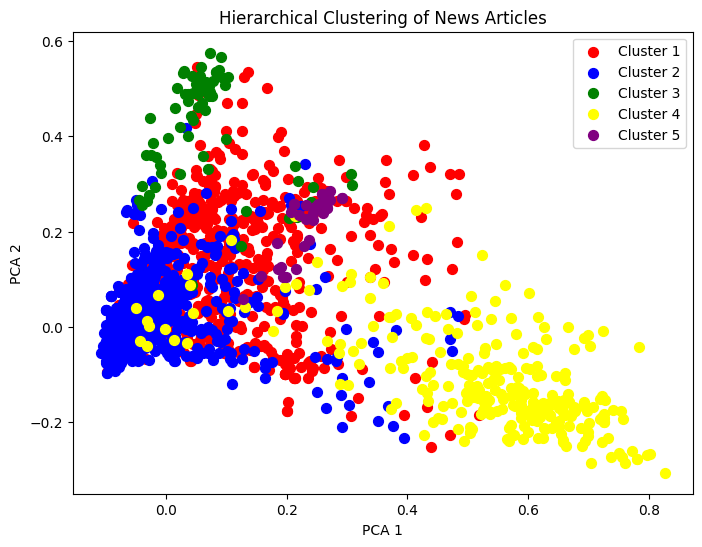

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(x_pca[y_hc==0, 0], x_pca[y_hc==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x_pca[y_hc==1, 0], x_pca[y_hc==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x_pca[y_hc==2, 0], x_pca[y_hc==2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(x_pca[y_hc==3, 0], x_pca[y_hc==3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(x_pca[y_hc==4, 0], x_pca[y_hc==4, 1], s=50, c='purple', label='Cluster 5')

plt.title("Hierarchical Clustering of News Articles")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, y_hc)

print("Silhouette Score:", score)


Silhouette Score: 0.006827686825189129


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler